**Problem Statement**

 

**A restaurant consolidator is looking to revamp the B2C portal using 
intelligent automation tech. This requires a different matrix to identify the 
star restaurants and generate recommendations. To make sure an 
effective model can be achieved, it is important to understand the 
behavior of the data in hand.**

**Data Preliminary analysis:**

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
Marketing_df = pd.read_excel('data.xlsx')

In [4]:
Marketing_df.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243
5,18352452,Lucky Cat Coffee & Kitchen,94,Jakarta,"Plaza Festival, South Parking, Jl. HR Rasuna S...","Plaza Festival, Kuningan","Plaza Festival, Kuningan, Jakarta",106.831748,-6.218932,"Cafe, Western",300000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,458
6,18386856,Onokabe,94,Tangerang,"Alam Sutera Town Center, Jl. Alam Utama, Serpo...","Alam Sutera Town Center, Serpong Utara","Alam Sutera Town Center, Serpong Utara, Tangerang",106.652688,-6.241792,Indonesian,300000,Indonesian Rupiah(IDR),No,No,3,3.7,Yellow,Good,155
7,7423482,Lemongrass,94,Bogor,"Jl. Raya Pajajaran No. 21, Bogor Utara, Bogor",Bogor Utara,"Bogor Utara, Bogor",106.807850,-6.576578,"Peranakan, Indonesian",250000,Indonesian Rupiah(IDR),No,No,3,4.0,Green,Very Good,1159
8,18391256,MONKS,94,Jakarta,"Komplek Graha Boulevard Timur, Summarecon Kela...",Kelapa Gading,"Kelapa Gading, Jakarta",106.911335,-6.163948,"Western, Asian, Cafe",250000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,259
9,7422633,Talaga Sampireun,94,Jakarta,Jl. Lingkar Luar Barat,Cengkareng,"Cengkareng, Jakarta",106.728508,-6.168467,"Sunda, Indonesian",200000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,1662


In [5]:
Marketing_df.shape

(9551, 19)

In [6]:
Marketing_df.dropna(inplace=True)
Marketing_df.drop_duplicates(inplace=True)
Marketing_df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.541000e+03,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000
mean,9.044236e+06,18.181008,64.274135,25.848826,1200.368096,1.804842,2.665171,156.707892
std,8.791953e+06,56.454284,41.199675,11.010633,16129.588655,0.905528,1.516672,430.180201
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019320e+05,1.000000,77.081601,28.478683,250.000000,1.000000,2.500000,5.000000
50%,6.003426e+06,1.000000,77.192035,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835266e+07,1.000000,77.282045,28.642713,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
Marketing_df.shape

(9541, 19)

In [8]:
Country_df = pd.read_excel('Country-Code.xlsx')

In [9]:
Country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 372.0+ bytes


In [10]:
Country_df

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [11]:
Marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9541 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9541 non-null   int64  
 1   Restaurant Name       9541 non-null   object 
 2   Country Code          9541 non-null   int64  
 3   City                  9541 non-null   object 
 4   Address               9541 non-null   object 
 5   Locality              9541 non-null   object 
 6   Locality Verbose      9541 non-null   object 
 7   Longitude             9541 non-null   float64
 8   Latitude              9541 non-null   float64
 9   Cuisines              9541 non-null   object 
 10  Average Cost for two  9541 non-null   int64  
 11  Currency              9541 non-null   object 
 12  Has Table booking     9541 non-null   object 
 13  Has Online delivery   9541 non-null   object 
 14  Price range           9541 non-null   int64  
 15  Aggregate rating      9541

**I'm removing the "Locality Verbose" column because it contains redundant information and breaks the First Normal Form (1NF) by holding multiple values in a single field. The Cuisines column also violates 1NF, but I’ve tackled that issue later in the code.**

In [12]:
Marketing_df.loc[:,['Locality','City','Locality Verbose']].head(5)

,Locality,City,Locality Verbose
0,"Grand Indonesia Mall, Thamrin",Jakarta,"Grand Indonesia Mall, Thamrin, Jakarta"
1,"Hotel Shangri-La, Sudirman",Jakarta,"Hotel Shangri-La, Sudirman, Jakarta"
2,Penjaringan,Jakarta,"Penjaringan, Jakarta"
3,Senopati,Jakarta,"Senopati, Jakarta"
4,Thamrin,Jakarta,"Thamrin, Jakarta"


In [13]:
Marketing_df.drop(columns=['Locality Verbose'],axis=1,inplace=True)

**Performing EDA:**


**Explore the geographical distribution of the restaurants**

In [14]:
merged_df = Marketing_df.merge(Country_df, how='left',on='Country Code')
merged_df.shape

(9541, 19)

In [15]:
restaurant_counts_country = merged_df.groupby('Country')['Restaurant ID'].count().reset_index()

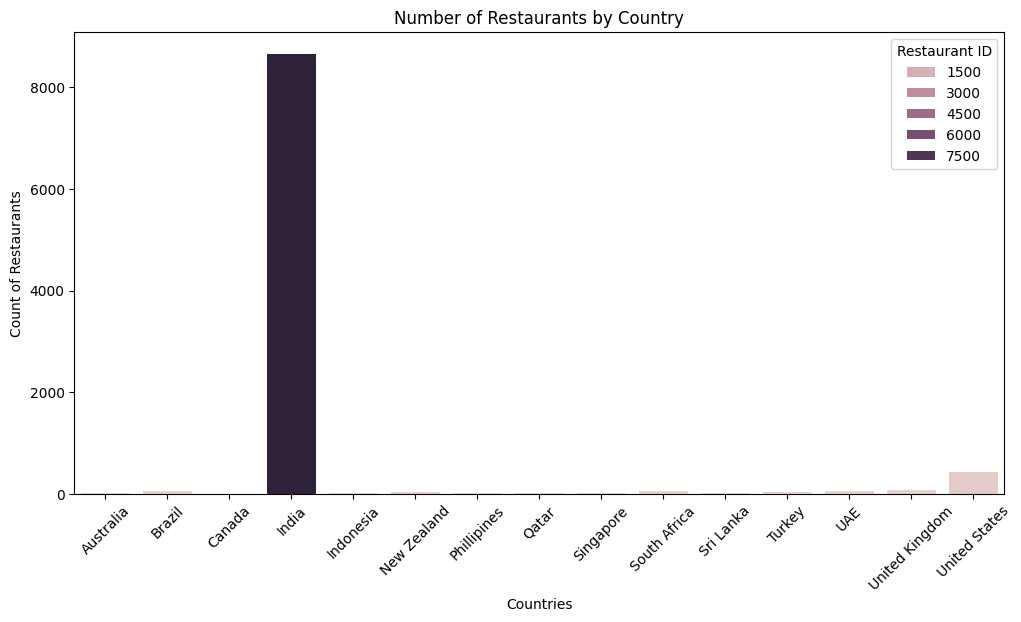

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(data=restaurant_counts_country,x='Country',y='Restaurant ID',hue='Restaurant ID')
plt.xlabel('Countries')
plt.ylabel('Count of Restaurants')
plt.title('Number of Restaurants by Country')
plt.xticks(rotation=45)
plt.show()

In [17]:
restaurant_counts_city = merged_df.groupby('City')['Restaurant ID'].count().reset_index()

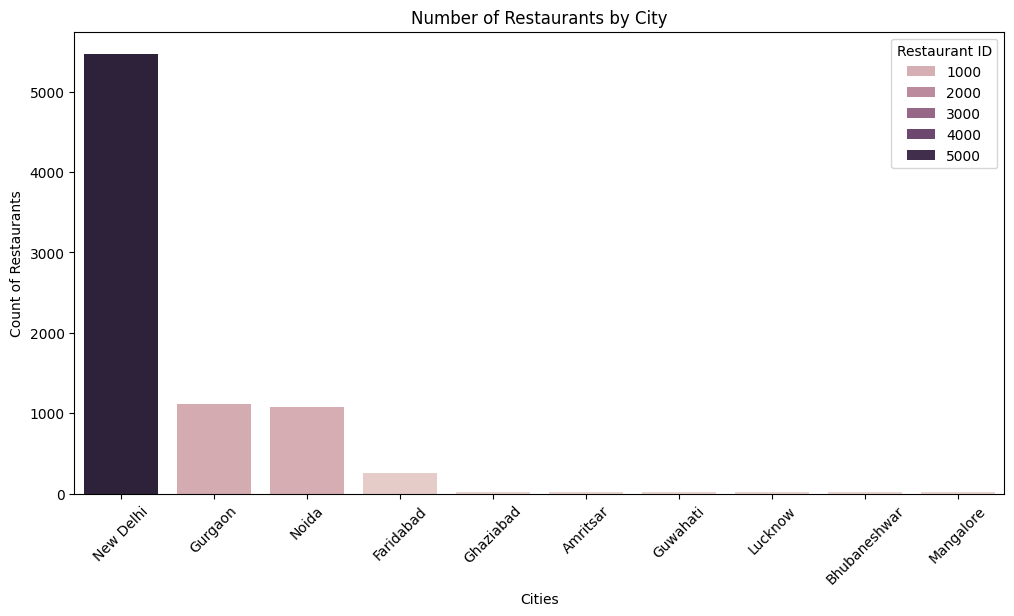

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(data=restaurant_counts_city.sort_values(by='Restaurant ID',ascending=False).head(10),x='City',y='Restaurant ID',hue='Restaurant ID')
plt.xlabel('Cities')
plt.ylabel('Count of Restaurants')
plt.title('Number of Restaurants by City')
plt.xticks(rotation=45)
plt.show()

**Explore how ratings are distributed overall.**

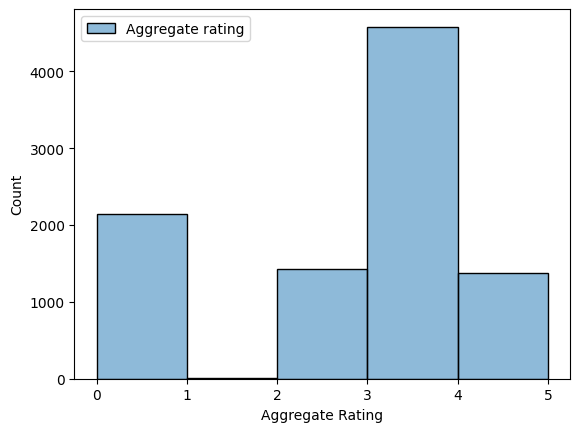

In [19]:
sns.histplot(merged_df[['Aggregate rating']],bins=[0,1,2,3,4,5])
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()

In [20]:
merged_df['Aggregate rating'].describe()

count    9541.000000
mean        2.665171
std         1.516672
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

**Restaurant franchising is a thriving venture. So, it is very important to explore the franchise with most national presence**

In [21]:
Top_10_restaurant_countries = merged_df.groupby('Restaurant Name')['Country'].count().reset_index()
Top_10_restaurant_countries

,Restaurant Name,Country
0,12212,1
1,Let's Burrrp,1
2,#45,1
3,#Dilliwaala6,1
4,#InstaFreeze,1
...,...,...
7431,t Lounge by Dilmah,1
7432,tashas,1
7433,wagamama,1
7434,{Niche} - Cafe & Bar,1


In [22]:
Top_10_restaurant_countries = Top_10_restaurant_countries.sort_values(by='Country', ascending=False).head(10)
Top_10_restaurant_countries

,Restaurant Name,Country
1098,Cafe Coffee Day,83
2096,Domino's Pizza,79
6097,Subway,63
2713,Green Chick Chop,51
4069,McDonald's,48
3472,Keventers,34
4952,Pizza Hut,30
2616,Giani,29
680,Baskin Robbins,28
663,Barbeque Nation,26


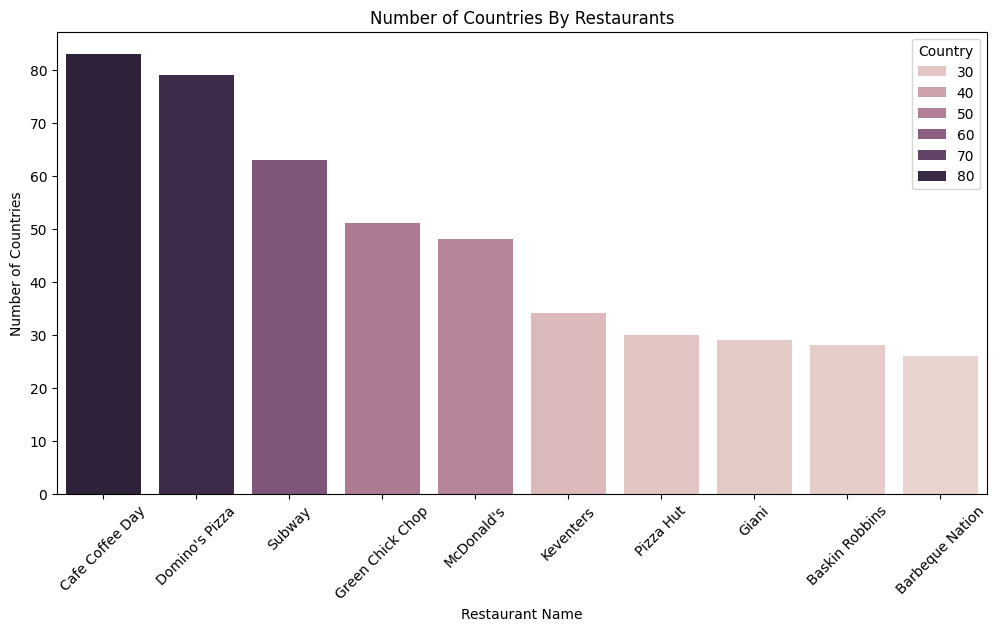

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(data=Top_10_restaurant_countries, x='Restaurant Name', y='Country',hue='Country')
plt.title('Number of Countries By Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45)
plt.show()

**What is the ratio between restaurants that allow table booking vs that do not allow table booking?**

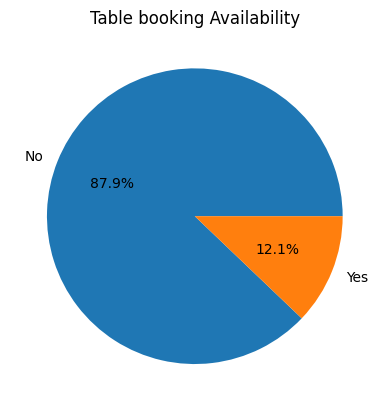

In [24]:
table_booking_counts = merged_df['Has Table booking'].value_counts()
plt.pie(table_booking_counts, labels=table_booking_counts.index, autopct='%1.1f%%')
plt.title('Table booking Availability')
plt.show()

**What is the percentage of restaurants providing online delivery?**

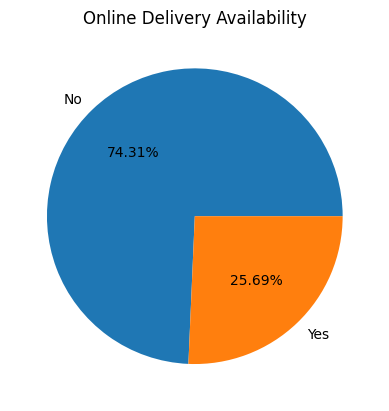

In [25]:
online_delivery_counts = merged_df['Has Online delivery'].value_counts()
plt.pie(online_delivery_counts, labels=online_delivery_counts.index, autopct='%1.2f%%')
plt.title('Online Delivery Availability')
plt.show()

**Is there a difference in no. of votes for the restaurants that deliver and the restaurant that don’t?**

**Hypothesis**

**H0: There is no difference in the mean number of votes between restaurants that offer online delivery and those that do not.**

**H1: There is a significant difference in the mean number of votes between restaurants that offer online delivery and those that do not.**

In [26]:
Delivery_yes = merged_df[merged_df['Has Online delivery'] == "Yes"]
Delivery_No = merged_df[merged_df['Has Online delivery'] == "No"]
print(f'having delivery mean: {Delivery_yes['Votes'].mean()}, not having delivery mean: {Delivery_No['Votes'].mean()}')

having delivery mean: 211.30722154222767, not having delivery mean: 137.83300423131172


In [27]:
from scipy.stats import ttest_ind

In [28]:
t_stat, p_value = ttest_ind(Delivery_yes['Votes'],Delivery_No['Votes'])
t_stat, p_value

(7.309242900296733, 2.902410753934874e-13)

**Based on the p-value, we reject the null hypothesis. This indicates that there is a significant difference in the Average number of votes between restaurants that offer online delivery and those that do not.**

..........

**What are the top 10 cuisines served across cities?**

**The Cuisines column is not compliant with the first normal form (NF1) because it contains multiple values in a single row. To address this, we need to split the data and expand it to get the top 10 cuisines across cities.**

In [29]:
#This turns the Cuisines column into a list, so the explode function can work properly.
exploded_df = merged_df.copy()
exploded_df['Cuisines_splitted'] = exploded_df['Cuisines'].str.split(',')
merged_df.shape

(9541, 19)

In [30]:
exploded_df = exploded_df.explode('Cuisines_splitted').astype('str')
exploded_df.loc[:,['Restaurant ID','Cuisines','Cuisines_splitted']].head(5)

,Restaurant ID,Cuisines,Cuisines_splitted
0,7402935,"Italian, Continental",Italian
0,7402935,"Italian, Continental",Continental
1,7410290,"Asian, Indonesian, Western",Asian
1,7410290,"Asian, Indonesian, Western",Indonesian
1,7410290,"Asian, Indonesian, Western",Western


In [31]:
exploded_df['Cuisines_splitted'].unique()

array(['Italian', ' Continental', 'Asian', ' Indonesian', ' Western',
       'Sushi', ' Japanese', 'Japanese', 'French', 'Cafe', 'Indonesian',
       'Peranakan', 'Western', ' Asian', ' Cafe', 'Sunda', 'Korean',
       'Desserts', ' Bakery', ' Sushi', ' Ramen', ' Italian',
       ' Coffee and Tea', 'Burger', 'Seafood', ' Desserts', ' Beverages',
       'European', ' Korean', ' Thai', ' Chinese', 'North Indian',
       ' Indian', ' South Indian', 'Malaysian', ' Kerala', ' Vietnamese',
       ' Sri Lankan', 'Chinese', 'Continental', ' North Indian',
       'South American', 'Modern Indian', 'Finger Food', 'Mediterranean',
       ' European', ' Middle Eastern', ' French', 'Spanish', 'Mughlai',
       ' Seafood', ' Mediterranean', ' Filipino', 'Thai', 'South Indian',
       ' Mughlai', 'American', ' Steak', ' Pizza', 'Drinks Only', 'Pizza',
       ' Salad', ' Finger Food', ' American', ' Fast Food',
       ' Street Food', ' Lebanese', ' Mexican', ' Tex-Mex', ' Lucknowi',
       ' Awadhi', 

In [32]:
# using ".str.strip()" to remove white spaces
exploded_df['Cuisines_splitted'] = exploded_df['Cuisines_splitted'].str.strip()
exploded_df['Cuisines_splitted'].unique()

array(['Italian', 'Continental', 'Asian', 'Indonesian', 'Western',
       'Sushi', 'Japanese', 'French', 'Cafe', 'Peranakan', 'Sunda',
       'Korean', 'Desserts', 'Bakery', 'Ramen', 'Coffee and Tea',
       'Burger', 'Seafood', 'Beverages', 'European', 'Thai', 'Chinese',
       'North Indian', 'Indian', 'South Indian', 'Malaysian', 'Kerala',
       'Vietnamese', 'Sri Lankan', 'South American', 'Modern Indian',
       'Finger Food', 'Mediterranean', 'Middle Eastern', 'Spanish',
       'Mughlai', 'Filipino', 'American', 'Steak', 'Pizza', 'Drinks Only',
       'Salad', 'Fast Food', 'Street Food', 'Lebanese', 'Mexican',
       'Tex-Mex', 'Lucknowi', 'Awadhi', 'Charcoal Grill', 'Kashmiri',
       'Moroccan', 'Arabian', 'Rajasthani', 'Burmese', 'Goan', 'Turkish',
       'Tea', 'Belgian', 'Bengali', 'British', 'Hyderabadi', 'Pakistani',
       'Chettinad', 'Contemporary', 'Greek', 'German', 'North Eastern',
       'Andhra', 'Parsi', 'Afghani', 'Biryani', 'Portuguese', 'African',
       'Mang

In [33]:
exploded_df.shape

(19706, 20)

**Since I’ll be working with this data for further analysis, I needed to fix the data structure. To do this, I created two tables: cuisine_master and cuisines_mapping_table. The cuisine_master table stores information about each unique cuisine, while the cuisines_mapping_table links restaurants to their respective cuisines.**
**I can’t use exploded_df directly because the Cuisines_splitted column violates the Fourth Normal Form (4NF).**

In [34]:
cuisine_master = pd.DataFrame(exploded_df['Cuisines_splitted'].unique())
cuisine_master.reset_index(inplace=True)
cuisine_master.rename(columns={0: 'Cuisines', 'index': 'Cuisine_id'}, inplace=True)
cuisine_master

,Cuisine_id,Cuisines
0,0,Italian
1,1,Continental
2,2,Asian
3,3,Indonesian
4,4,Western
...,...,...
140,140,Malay
141,141,Diner
142,142,Canadian
143,143,Soul Food


In [35]:
Cuisines_mapping_table = pd.merge(cuisine_master, exploded_df, how='inner', left_on='Cuisines', right_on='Cuisines_splitted')
Cuisines_mapping_table['Cuisine_id'].value_counts()

Cuisine_id
22     3959
21     2735
42     1986
35      995
0       763
       ... 
111       1
129       1
127       1
114       1
144       1
Name: count, Length: 145, dtype: int64

In [36]:
Cuisines_mapping_table = Cuisines_mapping_table.loc[:, ['Cuisine_id', 'Restaurant ID']]
Cuisines_mapping_table['Restaurant ID'] = Cuisines_mapping_table['Restaurant ID'].astype('int')
Cuisines_mapping_table

,Cuisine_id,Restaurant ID
0,0,7402935
1,0,7405789
2,0,2724
3,0,3910
4,0,18255131
...,...,...
19701,141,17334364
19702,141,17621796
19703,142,16643459
19704,143,17066603


**I'm going to remove the Original Cuisines column since it's no longer needed and would just be redundant information.**

In [37]:
Marketing_df.loc[:5,['Cuisines']]

,Cuisines
0,"Italian, Continental"
1,"Asian, Indonesian, Western"
2,"Sushi, Japanese"
3,Japanese
4,"French, Western"
5,"Cafe, Western"


In [38]:
merged_df.drop(columns=['Cuisines'],axis=1,inplace=True)
Marketing_df.drop(columns=['Cuisines'],axis=1,inplace=True)

**Displaying The Join System**

In [39]:
joined_table = pd.merge(merged_df,Cuisines_mapping_table,how='inner',on='Restaurant ID')
joined_table = pd.merge(joined_table,cuisine_master,how='inner',on='Cuisine_id')
joined_table

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Cuisine_id,Cuisines
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin",106.821999,-6.196778,800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia,0,Italian
1,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin",106.821999,-6.196778,800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia,1,Continental
2,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman",106.818961,-6.203292,800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia,2,Asian
3,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman",106.818961,-6.203292,800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia,3,Indonesian
4,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman",106.818961,-6.203292,800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia,4,Western
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19701,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,80.342796,26.474986,0,Indian Rupees(Rs.),No,No,1,3.9,Yellow,Good,127,India,18,Beverages
19702,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,80.342796,26.474986,0,Indian Rupees(Rs.),No,No,1,3.9,Yellow,Good,127,India,82,Ice Cream
19703,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,0.000000,0.000000,0,Indian Rupees(Rs.),No,No,1,3.8,Yellow,Good,78,India,43,Street Food
19704,18246202,VNS Live Studio,1,Varanasi,"Hotel Varuna Ground Floor, 22 Gulab Bagh, Sigr...",Sigra,82.991694,25.318345,0,Indian Rupees(Rs.),No,No,1,3.5,Yellow,Good,109,India,21,Chinese


In [40]:
top_10_cuisines = joined_table.groupby(['Cuisines'])['City'].nunique().reset_index()
top_10_cuisines = top_10_cuisines.sort_values(by='City', ascending=False).head(10)

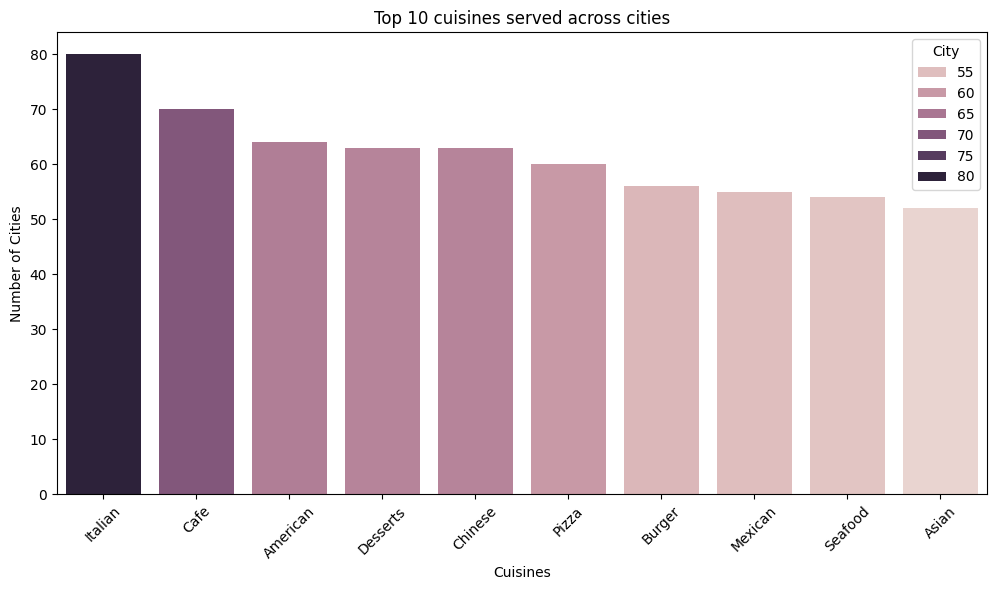

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_10_cuisines, x='Cuisines', y='City',hue='City')
plt.title('Top 10 cuisines served across cities')
plt.xlabel('Cuisines')
plt.ylabel('Number of Cities')
plt.xticks(rotation=45)
plt.show()

**What is the maximum and minimum no. of cuisines that a restaurant serves? Also, what is the relationship between No. of cuisines served and Votes**

In [42]:
Restaurant_cuisines_cnt = joined_table.groupby(['Restaurant ID','Votes'])['Cuisines'].count().reset_index()
print(f'Max: {Restaurant_cuisines_cnt['Cuisines'].max()}, Min: {Restaurant_cuisines_cnt['Cuisines'].min()}')

Max: 8, Min: 1


In [43]:
Restaurant_cuisines_cnt['Votes'].corr(Restaurant_cuisines_cnt['Cuisines'])

0.18368287769235458

In [44]:
from scipy.stats import spearmanr
spearmanr(Restaurant_cuisines_cnt['Votes'],Restaurant_cuisines_cnt['Cuisines'])

SignificanceResult(statistic=0.3266099053923786, pvalue=5.492488919195139e-236)

**There is a weak positive correlation between the number of cuisines served and restaurant Votes**

**This suggests that while restaurants offering more cuisines may receive slightly higher Votes, the relationship is not very strong despite being statistically significant.**

..................

**Explain the factors in the data that may have an effect on ratings e.g. No. of cuisines, cost, delivery option etc.**

**I'm excluding columns like [Restaurant ID, Restaurant Name, Country, City, Address, Locality, Longitude, Latitude, Currency, Cuisines] to address the problem statement about making a matrix for star restarants because the data is biased towards India, particularly New Delhi. Including location based data like Country and City could skew the results, and Restaurant ID and Name don’t contribute to determining star quality. As for Cuisines, including it might shift the focus to identifying the 'Best in Category' rather than creating a comprehensive matrix for star restaurants. However, I will consider the count of cuisines each restaurant offers as a potential factor.**

In [45]:
restaurant_counts_country.sort_values(by='Restaurant ID',ascending=False).head(5)

,Country,Restaurant ID
3,India,8651
14,United States,425
13,United Kingdom,80
1,Brazil,60
9,South Africa,60


In [46]:
restaurant_counts_city.sort_values(by='Restaurant ID',ascending=False).head(5)

,City,Restaurant ID
87,New Delhi,5473
50,Gurgaon,1118
88,Noida,1080
43,Faridabad,251
48,Ghaziabad,25


In [47]:
Cuisine_cnt = pd.merge(Marketing_df,joined_table.groupby('Restaurant ID')['Cuisines'].count().reset_index(),how='inner',on='Restaurant ID')

In [48]:
factors = Cuisine_cnt.loc[:,['Has Table booking','Has Online delivery','Cuisines','Average Cost for two','Votes','Price range','Aggregate rating',]]
factors

,Has Table booking,Has Online delivery,Cuisines,Average Cost for two,Votes,Price range,Aggregate rating
0,No,No,2,800000,1498,3,4.1
1,No,No,3,800000,873,3,4.6
2,No,No,2,500000,605,3,4.9
3,No,No,1,450000,395,3,4.2
4,No,No,2,350000,243,3,4.3
...,...,...,...,...,...,...,...
9536,No,No,3,0,63,1,4.3
9537,No,No,3,0,34,1,3.6
9538,No,No,6,0,127,1,3.9
9539,No,No,1,0,78,1,3.8


<Axes: >

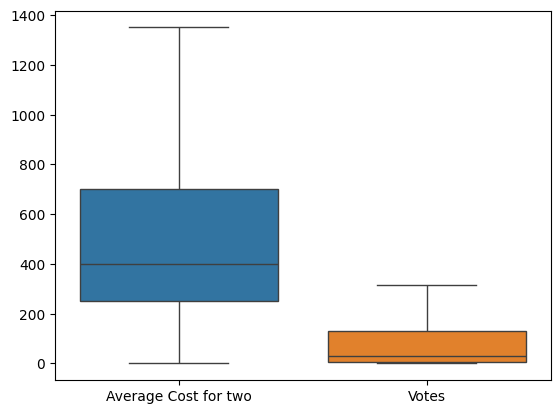

In [49]:
sns.boxplot(data=factors[['Average Cost for two','Votes']],showfliers=False)

<Axes: xlabel='Average Cost for two', ylabel='Count'>

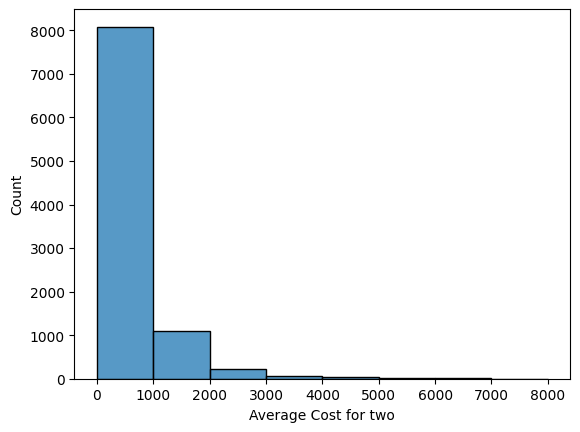

In [50]:
sns.histplot(factors['Average Cost for two'],binrange=[0,8000],binwidth=1000)

In [51]:
factors['Votes'].describe()

count     9541.000000
mean       156.707892
std        430.180201
min          0.000000
25%          5.000000
50%         31.000000
75%        130.000000
max      10934.000000
Name: Votes, dtype: float64

<Axes: xlabel='Votes', ylabel='Count'>

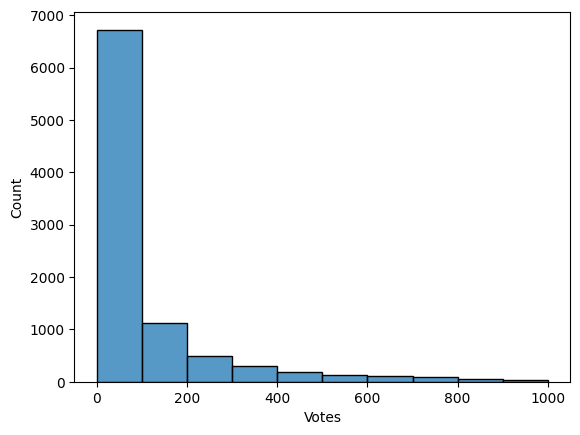

In [52]:
sns.histplot(factors['Votes'],binrange=[0,1000],binwidth=100)

In [ ]:
factors['Has Online delivery'] = factors['Has Online delivery'].replace({'Yes': 1, 'No': 0})
factors['Has Table booking'] = factors['Has Table booking'].replace({'Yes': 1, 'No': 0})

In [54]:
factors.corr()

,Has Table booking,Has Online delivery,Cuisines,Average Cost for two,Votes,Price range,Aggregate rating
Has Table booking,1.000000,0.101021,0.222750,0.007732,0.169693,0.502267,0.190537
Has Online delivery,0.101021,1.000000,0.162190,-0.019019,0.074629,0.077976,0.226405
Cuisines,0.222750,0.162190,1.000000,0.013287,0.183683,0.312936,0.250342
Average Cost for two,0.007732,-0.019019,0.013287,1.000000,0.067844,0.075121,0.051869
Votes,0.169693,0.074629,0.183683,0.067844,1.000000,0.309339,0.313404
Price range,0.502267,0.077976,0.312936,0.075121,0.309339,1.000000,0.438398
Aggregate rating,0.190537,0.226405,0.250342,0.051869,0.313404,0.438398,1.000000


In [55]:
for i in factors.columns:
    correlation, p_value = spearmanr(factors[i],factors['Aggregate rating'])
    print(f'{i}: correlation: {correlation}, p-value: {p_value}')
    print('\n')

Has Table booking: correlation: 0.20359813329752693, p-value: 8.114395234276648e-90


Has Online delivery: correlation: 0.16631009175259176, p-value: 3.893858963875474e-60


Cuisines: correlation: 0.24313352289862766, p-value: 2.0443790900795443e-128


Average Cost for two: correlation: 0.22214439501979394, p-value: 5.473199950019188e-107


Votes: correlation: 0.8461889124958387, p-value: 0.0


Price range: correlation: 0.49918933154491196, p-value: 0.0


Aggregate rating: correlation: 1.0, p-value: 0.0




**All The Columns are Statistically Significant based on the P-values**

**Initially, I used Pearson's correlation, but the results seemed off, so I switched to Spearman's correlation to see if the columns were related. Given the skewed data and possible non-linear relationships, Spearman's correlation was more appropriate, revealing statistically significant correlations between the columns.**

**I'll be grouping the data into different categories to see if there's a noticeable difference in ratings. Based on that, I'll create a matrix to identify the star restaurants.**

In [56]:
HOD_Y = factors[factors['Has Online delivery'] == 1]
HOD_N = factors[factors['Has Online delivery'] == 0]
ttest_ind(HOD_Y['Aggregate rating'],HOD_N['Aggregate rating'])

TtestResult(statistic=22.702018194453814, pvalue=3.64228018954869e-111, df=9539.0)

In [57]:
print(HOD_Y['Aggregate rating'].mean())
print(HOD_N['Aggregate rating'].mean())

3.249163606691147
2.4632863187588154


**Having online delivery gets us higher rating mean and they are statistically different**

In [58]:
HTB_Y = factors[factors['Has Table booking'] == 1]
HTB_N = factors[factors['Has Table booking'] == 0]
ttest_ind(HTB_Y['Aggregate rating'],HTB_N['Aggregate rating'])

TtestResult(statistic=18.956629253219, pvalue=1.0770535923426257e-78, df=9539.0)

In [59]:
print(HTB_Y['Aggregate rating'].mean())
print(HTB_N['Aggregate rating'].mean())

3.442659758203799
2.557771680782536


**Same case here Having Table booking gets us higher rating mean and they are statistically different**

In [60]:
price_ranges = [1, 2, 3, 4]
for i in range(len(price_ranges) - 1):
    PR_current = factors[factors['Price range'] == price_ranges[i]]
    PR_next = factors[factors['Price range'] == price_ranges[i+1]]
    ttest_result = ttest_ind(PR_current['Aggregate rating'], PR_next['Aggregate rating'])
    
    print(f"T-test between Price range {price_ranges[i]} and {price_ranges[i+1]}: {ttest_result}")
    print(f'mean values: {price_ranges[i]}: {factors[factors['Price range'] == price_ranges[i]]['Aggregate rating'].mean()}, '
          f'{price_ranges[i+1]}: {factors[factors['Price range'] == price_ranges[i+1]]['Aggregate rating'].mean()}')
    print('\n')

T-test between Price range 1 and 2: TtestResult(statistic=-27.470147979886985, pvalue=2.0134006245867722e-158, df=7549.0)
mean values: 1: 1.9974763406940061, 2: 2.9410536460006425


T-test between Price range 2 and 3: TtestResult(statistic=-20.623080827554457, pvalue=2.2160382428304766e-90, df=4515.0)
mean values: 2: 2.9410536460006425, 3: 3.6823361823361824


T-test between Price range 3 and 4: TtestResult(statistic=-3.583987069402501, pvalue=0.0003465404605290799, df=1988.0)
mean values: 3: 3.6823361823361824, 4: 3.819283276450512




**price range of 4 has the best rating average out of all them and they are statistically different**

In [61]:
factors['Cuisines'].unique()

array([2, 3, 1, 5, 4, 6, 7, 8], dtype=int64)

In [62]:
Cuisine_ranges = [1, 2, 3, 4, 5, 6, 7, 8]
for i in range(len(Cuisine_ranges) - 1):
    CR_current = factors[factors['Cuisines'] == Cuisine_ranges[i]]
    CR_next = factors[factors['Cuisines'] == Cuisine_ranges[i+1]]
    ttest_result = ttest_ind(CR_current['Aggregate rating'], CR_next['Aggregate rating'])
    
    print(f"T-test between Cuisine range {Cuisine_ranges[i]} and {Cuisine_ranges[i+1]}: {ttest_result}")
    print(f'mean values: {Cuisine_ranges[i]}: {factors[factors['Cuisines'] == Cuisine_ranges[i]]['Aggregate rating'].mean()}, '
          f'{Cuisine_ranges[i+1]}: {factors[factors['Cuisines'] == Cuisine_ranges[i+1]]['Aggregate rating'].mean()}')
    print('\n')

T-test between Cuisine range 1 and 2: TtestResult(statistic=-12.210627990246937, pvalue=6.144762447189284e-34, df=6836.0)
mean values: 1: 2.2306717737183264, 2: 2.6932926829268293


T-test between Cuisine range 2 and 3: TtestResult(statistic=-8.579242017725353, pvalue=1.2397259235336732e-17, df=5282.0)
mean values: 2: 2.6932926829268293, 3: 3.039239130434783


T-test between Cuisine range 3 and 4: TtestResult(statistic=-6.528643960464795, pvalue=8.058238249366328e-11, df=2421.0)
mean values: 3: 3.039239130434783, 4: 3.4149228130360205


T-test between Cuisine range 4 and 5: TtestResult(statistic=-1.2025797084534278, pvalue=0.22952106642863168, df=745.0)
mean values: 4: 3.4149228130360205, 5: 3.510365853658536


T-test between Cuisine range 5 and 6: TtestResult(statistic=-1.550461584785166, pvalue=0.12237072149557243, df=236.0)
mean values: 5: 3.510365853658536, 6: 3.67972972972973


T-test between Cuisine range 6 and 7: TtestResult(statistic=0.05019553858644796, pvalue=0.96006669119412

**The cuisine count range of 4 to 8 shows no significant statistical differences and maintains a solid average rating**

In [63]:
#grouping format (min-Q1, Q1-Q2, Q2-Q3, Q3-max, group of outliers)
Q1_AC,Q2_AC,Q3_AC = np.percentile(factors['Average Cost for two'],[25,50,75])
Min_to_Q1_AC = factors[factors['Average Cost for two'] <= Q1_AC]
Q1_to_Q2_AC = factors[(factors['Average Cost for two'] > Q1_AC) & (factors['Average Cost for two'] <= Q2_AC)]
Q2_to_Q3_AC = factors[(factors['Average Cost for two'] > Q2_AC) & (factors['Average Cost for two'] <= Q3_AC)]
Q3_to_max_AC = factors[factors['Average Cost for two'] > Q3_AC]


In [64]:
IQR_AC = Q3_AC - Q1_AC
UCL_AC = Q3_AC + 1.5 * IQR_AC
LCL_AC = Q1_AC - 1.5 * IQR_AC
LCL_group_AC = factors[factors['Average Cost for two'] < LCL_AC]
UCL_group_AC = factors[factors['Average Cost for two'] > UCL_AC]

In [65]:
group_names = [LCL_group_AC,Min_to_Q1_AC,Q1_to_Q2_AC,Q2_to_Q3_AC,Q3_to_max_AC,UCL_group_AC]
gp =  ['LCL_group','Min_to_Q1','Q1_to_Q2','Q2_to_Q3','Q3_to_Max','UCL_group']

for i in range(len(group_names) - 1):
    ttest_result = ttest_ind(group_names[i]['Aggregate rating'], group_names[i+1]['Aggregate rating'])

    print(f"T-test between Average Cost for two {gp[i]} and {gp[i+1]}: {ttest_result}")
    print(f'mean values for {gp[i]}: {group_names[i]['Aggregate rating'].mean()}, {gp[i+1]}: {group_names[i+1]['Aggregate rating'].mean()}')
    print('\n')

T-test between Average Cost for two LCL_group and Min_to_Q1: TtestResult(statistic=nan, pvalue=nan, df=nan)
mean values for LCL_group: nan, Min_to_Q1: 2.3494992295839756


T-test between Average Cost for two Min_to_Q1 and Q1_to_Q2: TtestResult(statistic=4.056860022021449, pvalue=5.052243459065505e-05, df=4825.0)
mean values for Min_to_Q1: 2.3494992295839756, Q1_to_Q2: 2.1518601523980276


T-test between Average Cost for two Q1_to_Q2 and Q2_to_Q3: TtestResult(statistic=-14.827758995421854, pvalue=1.0937589906185532e-48, df=4886.0)
mean values for Q1_to_Q2: 2.1518601523980276, Q2_to_Q3: 2.757847196085811


T-test between Average Cost for two Q2_to_Q3 and Q3_to_Max: TtestResult(statistic=-22.60158954027015, pvalue=1.7959211953505725e-107, df=4712.0)
mean values for Q2_to_Q3: 2.757847196085811, Q3_to_Max: 3.500583373845406


T-test between Average Cost for two Q3_to_Max and UCL_group: TtestResult(statistic=-5.880708592015484, pvalue=4.550357600768381e-09, df=2908.0)
mean values for Q3_to_M

**The outliers group has the highest mean rating, and the difference is statistically significant.**

In [66]:
Q1_V,Q2_V,Q3_V = np.percentile(factors['Votes'],[25,50,75])
Min_to_Q1_V = factors[factors['Votes'] <= Q1_V]
Q1_to_Q2_V = factors[(factors['Votes'] > Q1_V) & (factors['Votes'] <= Q2_V)]
Q2_to_Q3_V = factors[(factors['Votes'] > Q2_V) & (factors['Votes'] <= Q3_V)]
Q3_to_max_V = factors[factors['Votes'] > Q3_V]

In [67]:
IQR_V = Q3_V - Q1_V
UCL_V = Q3_V + 1.5 * IQR_V
LCL_V = Q1_V - 1.5 * IQR_V
LCL_group_V = factors[factors['Votes'] < LCL_V]
UCL_group_V = factors[factors['Votes'] > UCL_V]

In [68]:
group_names = [LCL_group_V,Min_to_Q1_V,Q1_to_Q2_V,Q2_to_Q3_V,Q3_to_max_V,UCL_group_V]
gp =  ['LCL_group','Min_to_Q1','Q1_to_Q2','Q2_to_Q3','Q3_to_Max','UCL_group']

for i in range(len(group_names) - 1):
    ttest_result = ttest_ind(group_names[i]['Aggregate rating'], group_names[i+1]['Aggregate rating'])
    
    print(f"T-test between Vote groups {gp[i]} and {gp[i+1]}: {ttest_result}")
    print(f'mean values for {gp[i]}: {group_names[i]['Aggregate rating'].mean()}, {gp[i+1]}: {group_names[i+1]['Aggregate rating'].mean()} ')
    print('\n')

T-test between Vote groups LCL_group and Min_to_Q1: TtestResult(statistic=nan, pvalue=nan, df=nan)
mean values for LCL_group: nan, Min_to_Q1: 0.4346963080587535 


T-test between Vote groups Min_to_Q1 and Q1_to_Q2: TtestResult(statistic=-116.93753670090025, pvalue=0.0, df=4826.0)
mean values for Min_to_Q1: 0.4346963080587535, Q1_to_Q2: 3.1014291901255957 


T-test between Vote groups Q1_to_Q2 and Q2_to_Q3: TtestResult(statistic=-23.17773146263008, pvalue=1.530807800648381e-112, df=4636.0)
mean values for Q1_to_Q2: 3.1014291901255957, Q2_to_Q3: 3.392958351223701 


T-test between Vote groups Q2_to_Q3 and Q3_to_Max: TtestResult(statistic=-34.43807287880867, pvalue=5.1628136923031004e-232, df=4711.0)
mean values for Q2_to_Q3: 3.392958351223701, Q3_to_Max: 3.8884228187919465 


T-test between Vote groups Q3_to_Max and UCL_group: TtestResult(statistic=-9.668704694407156, pvalue=7.645978373572974e-22, df=3512.0)
mean values for Q3_to_Max: 3.8884228187919465, UCL_group: 4.05070796460177 




**Same case here The outliers group has the highest mean rating, and the difference is statistically significant.**

In [69]:
star_restaurants = Cuisine_cnt.copy()

In [70]:
star_restaurants = star_restaurants[(star_restaurants['Has Table booking'] == "Yes") & 
        (star_restaurants['Has Online delivery'] == "Yes") & 
        (star_restaurants['Cuisines'].isin([4, 6, 7, 8])) & 
        (star_restaurants['Average Cost for two'] > UCL_AC) & 
        (star_restaurants['Votes'] > UCL_V) &
        (star_restaurants['Price range'] == 4)]

In [71]:
star_restaurants

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisines
211,929,Pebble Street,1,New Delhi,"8, Community Center, New Friends Colony, New D...","Community Centre, New Friends Colony",77.268938,28.562538,2400,Indian Rupees(Rs.),Yes,Yes,4,3.9,Yellow,Good,886,4
271,310737,7 Barrel Brew Pub,1,Gurgaon,"242A & 242B, 1st & 2nd Floor, DLF Mega Mall, D...","DLF Mega Mall, DLF Phase 1",77.093354,28.476193,2000,Indian Rupees(Rs.),Yes,Yes,4,4.4,Yellow,Good,490,6
282,4398,21 Gun Salute,1,Gurgaon,"SCO 35-36, 1st Foor, Main Market, Sector 29, G...",Sector 29,77.063147,28.468189,2000,Indian Rupees(Rs.),Yes,Yes,4,3.9,Yellow,Good,1365,4
296,7713,Ardor 2.1,1,New Delhi,"N-55/56 & 88/89, Outer Circle, Connaught Place...",Connaught Place,77.220172,28.630038,2000,Indian Rupees(Rs.),Yes,Yes,4,4.1,Green,Very Good,1821,4
324,303753,Elma's Brasserie,1,New Delhi,"73, Meherchand Market, Lodhi Colony, New Delhi",Lodhi Colony,77.226711,28.584460,2000,Indian Rupees(Rs.),Yes,Yes,4,4.0,Yellow,Good,393,4


In [72]:
star_restaurants['Aggregate rating'].mean()

4.0600000000000005

In [73]:
joined_table.groupby('Cuisines')['Aggregate rating'].mean()

Cuisines
Afghani          1.971429
African          3.525000
American         3.662308
Andhra           3.870000
Arabian          3.385714
                   ...   
Turkish Pizza    4.325000
Vegetarian       4.073913
Vietnamese       3.923810
Western          4.140000
World Cuisine    4.300000
Name: Aggregate rating, Length: 145, dtype: float64

**To identify star restaurants and offer useful recommendations, I've set up a matrix based on the data analysis. This matrix includes:**

**Online Delivery: The restaurant should provide online delivery services.**

**Table Booking: The restaurant should allow table booking.**

**Cuisines: The restaurant should offer between 4 to 8 different cuisines, as this range has shown to have a favorable average rating.**

**Average Cost for Two: The average cost for two people should be more than 1375.0.**

**Votes: The number of votes should be above 317.5.**

**Price Range: The restaurant should be in the 4th price range.**

**This matrix helps spot top-performing restaurants and make spot-on recommendations, fitting perfectly with the plan to revamp the B2C portal using smart automation. Applying this matrix also gives us an average rating of 4.**

................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................